In [2]:
using Plots
using Random
using LinearAlgebra
using Statistics
using StatsBase

In [3]:
mutable struct ind
    genes::BitArray{}
    fitness::Int64
end

function ind(N::Int64)
    ind(falses(N),0.)
end

function initialize(μ::Int64,N::Int64)
    Ind = ind(N)
    pop = fill(Ind,μ)
    for i in eachindex(pop)
        pop[i] = ind(N)
    end
    pop
end

import Base.isless

function isless(i1::ind,i2::ind) #opérateur pour comparer les individus
    i1.fitness > i2.fitness
end

isless (generic function with 45 methods)

In [4]:
function objective!(Ind::ind)
    Ind.fitness = sum(Ind.genes)
end

function evaluatepop!(pop::Array{ind})
    for i in eachindex(pop)
        objective!(pop[i])
    end
end

evaluatepop! (generic function with 1 method)

In [69]:
function tournament_select(population::Array{ind})
    tournament = sample(population, 3)
    sort!(tournament, rev=true)[1]
end

function uniform_crossover(p1::ind, p2::ind)
    child = copy(p1.genes)
    for i in eachindex(child)
        if rand() < 0.5
            child[i] = p2.genes[i]
        end
    end
    typeof(p1)(child, -Inf)
end

function one_point_crossover(p1::ind, p2::ind)
    child = copy(p1.genes)
    n = rand(1:length(p2.genes))
    child[n:end] = copy(p2.genes[n:end])
    typeof(p1)(child,0)
end

function fp_select(population::Array{ind})
    fits = [i.fitness for i in population]
    p = fits ./ sum(fits)
    (sample(population,Weights(p)),sample(population,Weights(p)))
end


function mutate(Ind::ind;p = 1/length(Ind.genes))
    child = copy(Ind.genes)
    
    for i in eachindex(Ind.genes)
        if rand()<p
            child[i] = ~Ind.genes[i]
        end
    end
    typeof(Ind)(child,0)
end


function copy_pop(pop::Array{ind})
    Ind = ind(length(pop[1].genes))
    copy_pop = fill(Ind,length(pop))
    
    for i in eachindex(pop)
        copy_pop[i].genes = copy(pop[i].genes)
    end
    copy_pop
end


copy_pop (generic function with 1 method)

In [146]:
crossover = one_point_crossover
select = fp_select

function step_ga(pop::Array{ind})
    unit = Int(round(length(pop)/10))  #10% de la population
    
#    println("input : ",pop)
    
#    println()
    
    pop
    
    evaluatepop!(pop)
    sort!(pop)
    new_pop = copy_pop(pop[1:unit])  # Les 10% meilleurs de la population sont conservés
#    println("sort : ",new_pop)
    max_fit = pop[1].fitness

    
    for i in 1:6*unit #60% de la population est sélectionnée par tournoi
        push!(new_pop,mutate(tournament_select(pop)))
    end
    
#    println("tournoi : ",new_pop)
    
    for i in 1:3*unit
        parents = select(pop)
        push!(new_pop,crossover(mutate(parents[1]),mutate(parents[2])))
    end
    
#    println("crossover : ",new_pop)
    
#    println()
#    println()
    
    new_pop , max_fit
end

function ga(n_gen::Int64,taille_pop::Int64,taille_ind::Int64)
    pop = initialize(taille_pop,taille_ind)
    
    max_fits = zeros(n_gen)
    
    for i in 1:n_gen
        pop,max_fit = step_ga(pop)
        max_fits[i] = max_fit
        #println(pop)
        #print(max_fit, " | ")
    end
    max_fits
end


ga (generic function with 1 method)

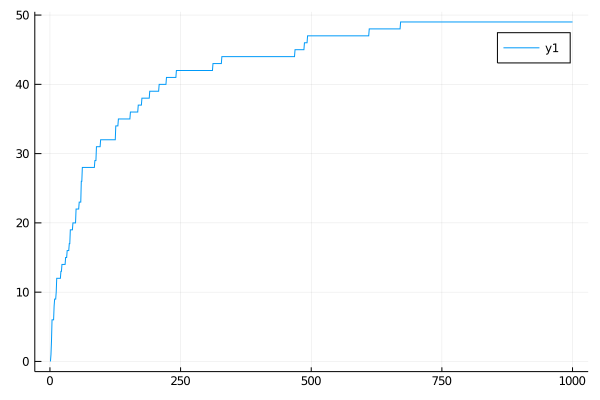

In [158]:
n_gen = 1000
taille_pop = 10
taille_ind = 50

plot(ga(n_gen,taille_pop,taille_ind))

In [99]:
pop = initialize(5,5)

temp_pop = copy_pop(pop)

for i in eachindex(pop)
    pop[i] = mutate(pop[i])
end
evaluatepop!(pop)
pop
sort!(pop)

crossover(mutate(pop[4]),mutate(pop[5]))

ind(Bool[1, 0, 0, 0, 0], 0)